# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
# Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Eliminem limitacions en l'amplada de les columnes
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Carreguem el dataset i el visualitzem
ruta = 'C:/Users/Ariadna/Desktop/IT ACADEMY/ESPECIALITZACIÓ/SPRINT 5/ENTREGA SPRINT 5/Lligues europees UEFA.csv'
df_uefa = pd.read_csv(ruta, sep=';', encoding='latin2') # Especifiquem separadors i encoding
df_uefa.head() # Mostrem els primers resultats

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [2]:
# Mirarem també quantes files té el nostre dataset (necessitarem aquesta informació més endavant per fer càlculs)

df_uefa.shape

(98, 21)

Com podem veure, el nostre dataset té 98 files i 21 columnes.

In [3]:
# Observem el tipus de variables del dataset per entendre de què es tracten
df_uefa.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

Primerament descriurem les variables per poder seleccionar un atribut que ens interessi.

1. Rk (Classificació): Variable discreta que representa la classificació de l'equip o el conjunt en una lliga o competició.

2. Squad (Equip): Variable categòrica nominal que representa el nom de l'equip de futbol.

3. Country (País): Variable categòrica nominal que representa el país de l'equip.

4. LgRk (Classificació de Lliga): Variable numèrica discreta que representa la classificació de l'equip dins de la lliga.

5. MP (Partits Jugats): Variable numèrica discreta que representa el nombre de partits jugats per l'equip.

6. W (Victòries): Variable numèrica discreta que representa el nombre de partits guanyats per l'equip.

7. D (Empats): Variable numèrica discreta que representa el nombre de partits que han acabat en empat per l'equip.

8. L (Derrotes): Variable numèrica discreta que representa el nombre de partits perduts per l'equip.

9. GF (Gols a Favor): Variable numèrica discreta que representa el nombre total de gols marcats per l'equip.

10. GA (Gols en Contra): Variable numèrica discreta que representa el nombre total de gols encaixats per l'equip.

11. GD (Diferència de Gols): Variable numèrica discreta que representa la diferència entre els gols marcats (GF) i els gols encaixats (GA).

12. Pts (Punts): Variable numèrica discreta que representa el nombre total de punts guanyats per l'equip a la lliga o competició.

13. Pts/G (Punts Per Partit): Variable numèrica contínua que representa el nombre mitjà de punts guanyats per partit.

14. xG (Gols Esperats): Variable numèrica contínua que representa el nombre de gols esperats que un equip hauria de marcar basant-se en diversos factors.

15. xGA (Gols Esperats en Contra): Variable numèrica contínua que representa el nombre de gols esperats que un equip hauria d'encaixar basant-se en diversos factors.

16. xGD (Diferència de Gols Esperada): Variable numèrica contínua que representa la diferència entre els gols esperats marcats (xG) i els gols esperats encaixats (xGA).

17. xGD/90 (Diferència de Gols Esperada per 90 Minuts): Variable numèrica contínua que representa la diferència de gols esperada per cada 90 minuts de joc.

18. Last 5 (Últims 5): Variable categòrica ordinal que ens dóna informació sobre el rendiment de l'equip en els darrers 5 partits (si ha guanyat o ha perdut). 

19. Attendance (Assistència): Variable numèrica discreta que representa el nombre d'espectadors o seguidors que han assistit als partits de l'equip.

20. Top Team Scorer (Golejador Principal): Variable categòrica nominal que representa el nom del màxim golejador de l'equip.

21. Goalkeeper (Porter): Variable categòrica nominal que representa el nom del porter de l'equip.

Com hem pogut veure, el dataset conté informació sobre la UEFA, incloent dades sobre el rendiment de l'equip, estadístiques i altres detalls com l'assistència del públic. Ens pot servir doncs, per analitzar el rendiment dels diferents equips. 

En aquest cas, hem decidit analitzar si l'assistència de públic influeix en el rendiment de l'equip. Per tant, seleccionarem la variable independent 'Attendance' (Assistència) i la variable dependent 'Pts' (Punts). Amb l'objectiu d'obtenir aquesta informació concreta, definim el test d'hipòtesi següent:
- Ho (Hipòtesi nul.la): No hi ha relació entre les variables seleccionades. És a dir, el nivell d'assistència de públic no influeix en el rendiment de l'equip.
- Ha (Hipòtesi alternativa): Hi ha una relació entre les variables seleccionades. És a dir, el nivell d'assistència influeix en el rendiment de l'equip.

Ara farem un anàlisi de regressió per provar la relació entre l'assistència i els punts guanyats per l'equip, que ens proporcionarà el coeficient per a l'assistència, juntament amb el seu p-valor. D'aquesta manera podrem avaluar la significació estadística de la relació entre aquestes variables.

In [4]:
# Importem la llibreria necessària per fer els càlculs
import statsmodels.api as sm

# Definim les variables independents i dependents
X = df_uefa['Attendance']  # Variable independent (assistència)
y = df_uefa['Pts']         # Variable dependent (punts)

# Afegim una constant per al model
X = sm.add_constant(X)

# Creem el model de regressió
model = sm.OLS(y, X).fit()

# Obtenim els resultats de la regressió
resultats = model.summary()

# Mostrem els resultats
print(resultats)


                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     48.48
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           4.14e-10
Time:                        15:36:42   Log-Likelihood:                -391.25
No. Observations:                  98   AIC:                             786.5
Df Residuals:                      96   BIC:                             791.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4736      2.568     13.424      0.0

Els resultats de l'anàlisi de regressió són els següents:

R-squared (R²): Aquesta és la proporció de la variabilitat de la variable dependent (Pts) que s'explica per la variable independent (Attendance). En aquest cas, R² és 0,336, el que significa que aproximadament el 33,6% de la variabilitat en els punts de l'equip es pot explicar per l'assistència. Això suggereix que hi ha una correlació moderada entre l'assistència i els punts de l'equip.

F-statistic: Aquest valor estadístic és utilitzat per avaluar la significació global del model de regressió. En aquest cas és 48,48, i el p-valor associat és 4.14e-10 (pràcticament zero). Això indica que el model de regressió és estadísticament significatiu i que l'ús de l'assistència com a variable independent té un impacte significatiu en la predicció dels punts de l'equip.

Coeficients:
   - El coeficient constant (const) és 34,4736. Això significa que quan l'assistència és zero, es pot esperar que l'equip tingui al voltant de 34,47 punts.
   - El coeficient de l'assistència (Attendance) és 0,0006. Això indica que per cada unitat addicional d'assistència, es pot esperar un augment de 0,0006 punts en la puntuació de l'equip.

P-value: El p-valor associat al coeficient de l'assistència és 0,000, el que és molt menor que el nivell de significació típic d'α = 0,05. Segons els resultats de l'anàlisi de regressió, l'assistència té un impacte significatiu en els punts de l'equip. El model de regressió és estadísticament significatiu, i l'assistència té una influència positiva en el rendiment de l'equip en terme de punts.

Aquests valors també ens indiquen que la relació entre les dues variables és positiva. És a dir, si augmenta la variable independent 'Assistance' augmenta també la variable dependent 'Pts'.

Finalment, volem saber si amb un nivell de significació del 5% (α = 0.05), el p-valor rebutja la hipòtesi nul.la. En aquest cas, el p-valor és 0.000, que és menor que α = 0.05. Això significa que podem rebutjar la hipòtesi nul.la i que per tant, hi ha prou evidència estadística per concloure que l'assistència influeix en el rendiment de l'equip en terme de punts amb un nivell de confiança del 95%.



Validació i diagnòstic del model de regressió:

Un cop observats els valors, ara passem a analitzar la relació entre les variables: la linealitat, homocestacitat, normalitat i independència.

En primer lloc, per saber si la relació entre la variable independent i la dependent són lineals, podem observar-ho gràficament amb un diagrama de dispersió (scatterplot). 

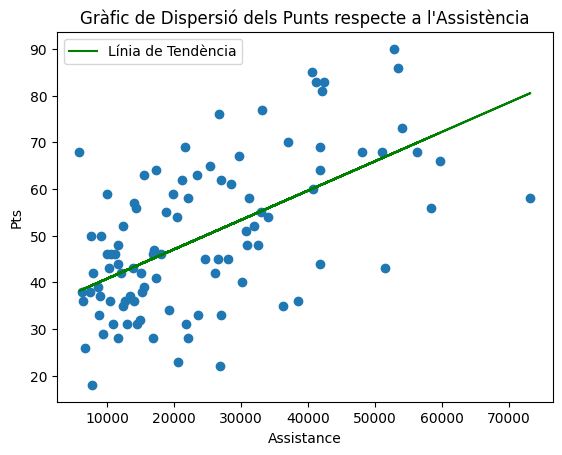

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 'x' és la variable independent ('Attendance') i 'y' la variable dependent ('Pts')
x = df_uefa['Attendance']
y = df_uefa['Pts']

# Calculem els coeficients de la línia de regressió
coeficients = np.polyfit(x, y, 1)  # El '1' indica regressió lineal (polinomi de grau 1)
tendencia = np.poly1d(coeficients)

# Creaem el gràfic de dispersió
plt.scatter(x, y)

# Afegim la línia de tendència al gràfic
plt.plot(x, tendencia(x), color='green', label='Línia de Tendència')

# Afegim títols i etiquetes
plt.title('Gràfic de Dispersió dels Punts respecte a l\'Assistència')
plt.xlabel('Assistance')
plt.ylabel('Pts')
plt.legend()

# Mostrem el gràfic
plt.show()


Com podem veure al gràfic, la relació entre les dues variables és lineal, malgrat que alguns punts estan una mica allunyats de la línia de tendència.

A continuació comprovarem la homocedasticitat, que es dóna quan la variabilitat dels errors (o residus) en un model de regressió és constant al llarg de totes les observacions. Això significa que, independentment del valor que prengui la variable independent (la causa que estem estudiant), la dispersió dels errors en les nostres prediccions (la diferència entre el que el model prediu i el que realment passa) roman igual. La heterocedasticitat és el cas oposat, quan la variabilitat dels errors varia i no és constant a través de les observacions. Els errors poden ser molt grans per a alguns valors de la variable independent i petits per a altres, suggerint que el model potser no està capturant alguna característica important dels dades. Per comprovar-ho gràficament farem un Gràfic de Residus vs. Valors Ajustats.

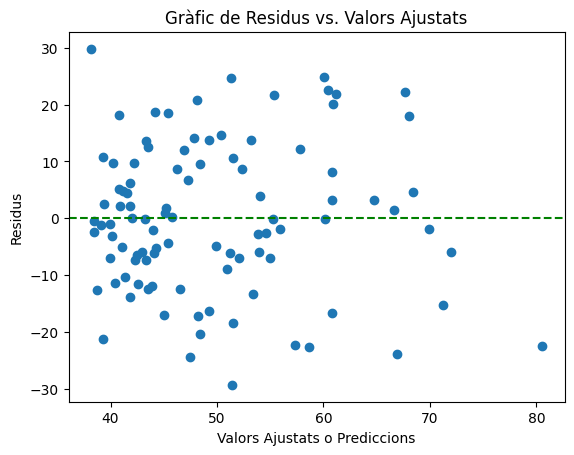

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ajustem el model de regressió
model = sm.OLS(y, sm.add_constant(x)).fit()
predictions = model.predict(sm.add_constant(x))
residus = model.resid

# Creem el gràfic de residus
plt.scatter(predictions, residus)
plt.axhline(0, linestyle='--', color='green')
plt.xlabel('Valors Ajustats o Prediccions')
plt.ylabel('Residus')
plt.title('Gràfic de Residus vs. Valors Ajustats')
plt.show()


Com podem veure en el gràfic de Residus vs. Valors Ajustats, la variabilitat dels errors o residus es manté constant al llarg del rang de valors ajustats. Aquesta dispersió consistent dels residus al voltant de la línia zero, suggereix que la suposició de homoscedasticitat es compleix per al nostre model de regressió. En casos com aquest, podem tenir més confiança en les nostres inferències estadístiques, com el test d'hipòtesi, ja que es basen en la suposició de variància igual a través de tots els nivells de les variables independents.

Ara comprovarem si hi ha normalitat en els residus del nostre model de regressió. És important perquè els tests d'hipòtesi assumeixen que els residus són normalment distribuïts. Ho comprovarem mitjançant un histograma dels residus i un gràfic Q-Q dels residus i alhora aplicant un test de Shapiro-Wilk als residus.

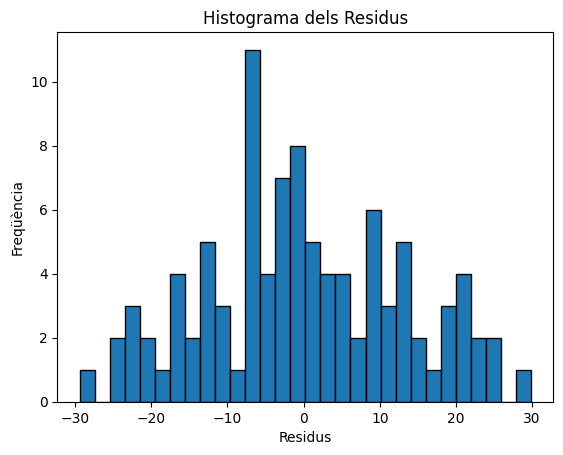

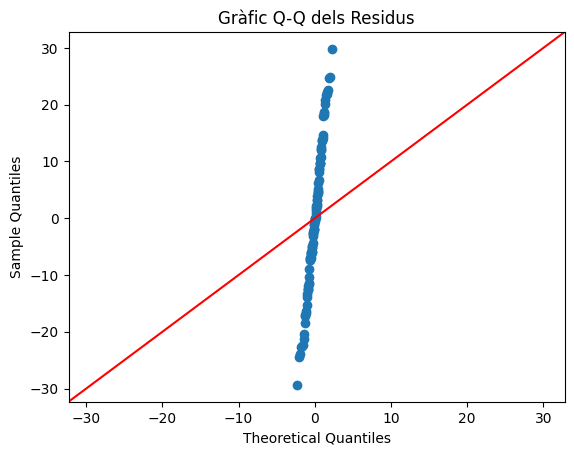

Estadístic de Shapiro-Wilk: 0.9879190921783447, p-valor: 0.5171495079994202


In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Ajustem el model de regressió
model = sm.OLS(df_uefa['Pts'], sm.add_constant(df_uefa['Attendance'])).fit()

# Obtenim els residus
residus = model.resid

# Creem un histograma dels residus
plt.hist(residus, bins=30, edgecolor='black')
plt.title('Histograma dels Residus')
plt.xlabel('Residus')
plt.ylabel('Freqüència')
plt.show()

# Creem un gràfic Q-Q dels residus
sm.qqplot(residus, line ='45')
plt.title('Gràfic Q-Q dels Residus')
plt.show()

# Fem un Test de Shapiro-Wilk per la normalitat dels residus
stat, p = shapiro(residus)
print(f'Estadístic de Shapiro-Wilk: {stat}, p-valor: {p}')


L'Histograma de residus ens mostra certa normalitat en les dades (en forma de campana simètrica), malgrat que una de les columnes presenta valors atípics o outliers, amb una freqüència superior a 11 i alguns valors centrals són massa baixos (amb una freqüència d'1 aprox.). <br>

Pel que fa al Gràfic Q-Q dels residus, els valors es distribueixen en una línia vertical i no diagonal com representaria una normalitat. Això ens porta a pensar que potser hauríem de considerar si un model més complex o diferent (com una regressió no lineal) seria més adequat.

Per altra banda, l'estadístic de Shapiro-Wilk ens dóna com a valor 0.9879. Un valor proper a 1 indica que les dades estan més properament alineades amb una distribució normal, com en aquest cas. Això suggereix que la distribució dels residus no es desvien molt de la normalitat. Pel que fa al p-valor, ens diu si hi ha evidència estadística suficient per rebutjar la hipòtesi nul·la de la prova. La hipòtesi nul·la per aquest test és que les dades estan distribuïdes normalment. En aquest cas, un p-valor de 0.517 és molt més gran que el nivell de significació estàndard de 0.05, per la qual cosa no rebutgem la hipòtesi nul·la.

Basant-nos en el test de Shapiro-Wilk, no hi ha raons per creure que els residus del model es desvien de la normalitat. Això implica que les suposicions sobre la normalitat dels errors per a les inferències estadístiques associades amb el model creat de regressió són raonablement sòlides.

Per avaluar la independència dels residus en el nostre model de regressió, ens interessa comprovar si hi ha autocorrelació entre els residus. L'autocorrelació dels residus pot indicar que falta alguna informació en el model, com ara una altra variable explicativa, o que el model no captura adequadament una tendència temporal o espacial. Per fer-ho utilitzarem el Test de Durbin-Watson. 

In [8]:
from statsmodels.stats.stattools import durbin_watson

residus = model.resid

# Apliquem el test de Durbin-Watson
dw = durbin_watson(residus)
print(f'Estadístic de Durbin-Watson: {dw}')

Estadístic de Durbin-Watson: 0.6544823053774089


El resultat ens suggereix una autocorrelació positiva significativa entre els residus del model de regressió, ja que un valor menor de 2 indica autocorrelació positiva (un valor de 2.0 suggereix l'absència d'autocorrelació i
un valor substancialment més gran que 2.0 indica autocorrelació negativa). Com que en el nostre cas l'estadístic de Durbin-Watson està molt per sota de 2.0, és una indicació forta que els residus consecutius estan correlacionats positivament. Això vol dir que si un residu és positiu, és probable que el següent també ho sigui, i el mateix per als residus negatius.

La presència d'autocorrelació en els residus pot ser un indicador de diversos problemes potencials en el model de regressió, com el cas que el model no inclogui alguna variable independent que és important per a la predicció de la variable dependent o que la relació entre les variables sigui no lineal. També pot ser que hi hagi una omissió de variables que afecten la variable dependent, que en aquest cas creiem que és molt probable perquè només hem mirat la variable Attendance quan n'hi ha vàries que poden afectar al resultat del partit i no una de sola.

# Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Hem decidit comparar les mitjanes de punts entre equips de dos països diferents. Per fer-ho, farem un t-test.

Primer establim la hipòtesi nul.la i alternativa:

H0 = No hi ha diferències estadístiques entre la mitjana de punts dels equips d'Espanya i Anglaterra <br>
H1 = Hi ha diferències estadístiques entre la mitjana de punts dels equips d'Espanya i Anglaterra

In [9]:
from scipy.stats import ttest_ind

# Comparem la mitjana de punts entre equips d'Espanya i Anglaterra
equips_espanya = df_uefa[df_uefa['Country'] == 'ESP']['Pts']
equips_anglaterra = df_uefa[df_uefa['Country'] == 'ENG']['Pts']

# Calculem el t-test per a dues mostres independents
t_stat, p_value = ttest_ind(equips_espanya, equips_anglaterra)

# Mostrem els resultats
print(f"Estadística t: {t_stat:.2f}")
print(f"P-valor: {p_value:.5f}")

# Decidim si rebutjem la hipòtesi nul·la
if p_value < 0.05:
    print("Rebutgem la hipòtesi nul·la, les mitjanes són estadísticament diferents.")
else:
    print("No rebutgem la hipòtesi nul·la, no hi ha diferències estadístiques en les mitjanes.")


Estadística t: -0.07
P-valor: 0.94071
No rebutgem la hipòtesi nul·la, no hi ha diferències estadístiques en les mitjanes.


També podem comparar el xG (Expected Goals) entre dues lligues:

Primer establim la hipòtesi nul.la i alternativa:

H0 = No hi ha diferències estadístiques entre els gols esperats de les lligues espanyola i anglesa. <br>
H1 = Hi ha diferències estadístiques entre els gols esperats de les lligues espanyola i anglesa.

In [11]:
# Comparem la mitjana de xG entre equips de la lliga espanyola i la lliga anglesa
xg_espanya = df_uefa[df_uefa['Country'] == 'ESP']['xG']
xg_anglaterra = df_uefa[df_uefa['Country'] == 'ENG']['xG']

# Realitzem el t-test
t_stat, p_value = ttest_ind(xg_espanya, xg_anglaterra)

# Mostrem resultats
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Decidim si rebutjem la hipòtesi nul·la
if p_value < 0.05:
    print("Rebutgem la hipòtesi nul·la, hi ha diferències estadístiques entre els XG de les 2 lligues.")
else:
    print("No rebutgem la hipòtesi nul·la, no hi ha diferències estadístiques entre els XG de les 2 lligues.")


T-statistic: -0.98
P-value: 0.33163
No rebutgem la hipòtesi nul·la, no hi ha diferències estadístiques entre els XG de les 2 lligues.


# Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.



Els tres atributs que seleccionarem seran:

- Country (país), com a variable independent categòrica. Aquesta variable pot servir per agrupar equips en diferents nivells segons el país al qual pertanyen. Per investigar si hi ha diferències en el rendiment (mesurat per qualsevol variable dependent contínua) entre aquests països.

- xG (Gols Esperats), com a primera variable dependent contínua. És una mesura del nombre de gols que un equip hauria d'haver marcat basant-se en la qualitat de les oportunitats creades.

- xGA (Gols Esperats en Contra), com a segona variable dependent contínua. És una mesura del nombre de gols que un equip hauria d'haver rebut basant-se en la qualitat de les oportunitats concedides.

Amb aquestes variables, podem fer un ANOVA (Anàlisi de la variància) per determinar si hi ha diferències significatives en els gols esperats (xG) o els gols esperats en contra (xGA) entre els equips de diferents països.

Primer de tot establim les hipòtesis:
    
H0: No hi ha diferències significatives entre la mitjana de xG o xGA, és la mateixa per a tots els països.

H1: Almenys en un país, la mitjana de xG o xGA difereix d'una o més de les altres mitjanes de països.

In [14]:
import pandas as pd
from scipy import stats

# Agrupem les dades per país per a xG i xGA
groups_xG = df_uefa.groupby('Country')['xG'].apply(list)
groups_xGA = df_uefa.groupby('Country')['xGA'].apply(list)

# Realitzem l'ANOVA per a xG
anova_result_xG = stats.f_oneway(*groups_xG)

# Realitzem l'ANOVA per a xGA
anova_result_xGA = stats.f_oneway(*groups_xGA)

# Mostrem els resultats
print(f"El resultat de l'ANOVA per xG és: F={anova_result_xG.statistic:.2f}, p={anova_result_xG.pvalue:.5f}")
print(f"El resultat de l'ANOVA per xGA és: F={anova_result_xGA.statistic:.2f}, p={anova_result_xGA.pvalue:.5f}")


El resultat de l'ANOVA per xG és: F=0.42, p=0.79214
El resultat de l'ANOVA per xGA és: F=0.69, p=0.60074


En ambdós casos, els p-valors són molt més grans que el nivell de significació estàndard de 0.05, és a dir que no podem rebutjar la hipòtesi nul.la. Això significa que no hi ha evidència estadística suficient per afirmar que hi ha diferències significatives en els gols esperats marcats (xG) o els gols esperats rebuts (xGA) entre els equips de diferents països del nostre dataset. 